<a href="https://colab.research.google.com/github/kachen1982/-Detector_MASK/blob/main/%E3%80%8C%E3%80%8C%E9%99%B3%E5%98%89%E9%9B%84_price_ipynb%E3%80%8Di5_0305.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 讀入Package

In [ ]:
!pip install openpyxl==3.0.5
import tensorflow as tf
from google.colab import files
import io
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
import random
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

     |████████████████████████████████| 242 kB 5.1 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


## 2. 取得資料集

In [ ]:
# Excel 檔案上傳
uploaded = files.upload()

Saving 1421CPU.xlsx to 1421CPU.xlsx


MessageError: ignored

In [ ]:
train_df = pd.read_excel("1421CPU.xlsx") 
train_df = train_df[::1] 
print(train_df.head())
print("Product : ",train_df["Product"].unique()) 
train_df.head() 

   Brand Category       Date    Customer  ... profit (NT.)      GP  Sales   PM
0  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    3962.0095  0.0383    許柏洋  陳柏伸
1  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...   24660.3071  0.1034    許柏洋  鍾惠琪
2  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    1772.0469  0.6374    許柏洋  鍾惠琪
3  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...     915.9484   0.183    許柏洋  鍾惠琪
4  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    8895.4526  0.2312    許柏洋  鍾惠琪

[5 rows x 16 columns]
Product :  ['CM8068404196203 SRGDX(I7-9700E)' '*CM8066201920103 SR2L2(i7-6700)'
 '*CM8062301046804 SR05J (G540)' ... 'CL8064701558100 SR1E3(3556U )'
 'CM8062107184801 SR0GZ (E5-2660)' 'HH80557PG0492M SLA95 (E4500)']


,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪


In [ ]:
def filterProduct(productName):
  name = re.search(r'\(([a-zA-Z][1-9]-.+)\)$$',productName)
  if(name == None):
    return float('NaN')
  else:
    return name.group(1).lower()

train_df["filterProduct"] = train_df["Product"].apply(filterProduct)
train_df.head()

,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM,filterProduct
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸,i7-9700e
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪,i7-6700
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪,NaN
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪,e3-1220 v6
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪,e5-1650 v3


In [ ]:
a = train_df["filterProduct"].value_counts(dropna=True).to_dict()
print(a)

{'i7-3770': 1461, 'i7-6700': 1356, 'i7-6700te': 1215, 'i5-6500te': 1145, 'i3-3220': 1089, 'i5-6500': 797, 'i3-6100': 792, 'i5-520m': 765, 'i5-2400': 606, 'i7-7700': 593, 'e5-2620 v4': 568, 'i7-4790': 556, 'i5-3610me ': 551, 'i3-6100te': 526, 'i3-4330': 478, 'i5-3550s': 477, 'i7-2600': 473, 'i7-8700': 443, 'i3-3120me': 435, 'i7-4770s': 421, 'e5-2620 v3': 421, 'i3-6100u': 413, 'e3-1275 v3 ': 407, 'i7-6600u': 380, 'i7-3610qe': 378, 'i5-4590t': 369, 'i3-3120m': 365, 'i7-620m': 364, 'i5-6300u': 356, 'e5-2630 v2 ': 328, 'e5-2630 v3': 325, 'e5-2640 v4': 322, 'e5-2640 v3': 321, 'i5-7500': 321, 'i3-2120': 319, 'i7-4790s': 304, 'e3-1275v2': 302, 'i7-8700t': 299, 'e5-2620': 280, 'i5-4570te': 274, 'i5-3210m': 272, 'i5-7500t': 260, 'e5-2630 v4': 256, 'i7-4770te': 255, 'e5-2650 v4': 253, 'e3-1225 v3': 253, 'i7-4710mq': 242, 'i5-4570': 231, 'i7-7700t': 222, 'e5-2620 v2 ': 222, 'e5-2690 v4': 211, 'i5-8500': 208, 'e5-2650v2': 204, 'e5-1650 v3': 204, 'e5-2609 v2 ': 203, 'i5-8500t': 202, 'i3-4130': 201, 

In [ ]:
date_list = train_df["Date"].apply(lambda x: x.strftime("%Y-%m-%d")).iloc[::-1].unique()
print(date_list,len(date_list))

['2014-01-02' '2014-01-03' '2014-01-06' ... '2021-11-24' '2021-11-25'
 '2021-11-26'] 1953


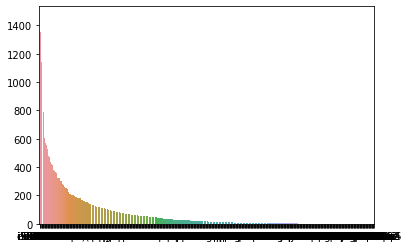

In [ ]:
keys = list(a.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(a[k]) for k in keys]
sns.barplot(x=keys, y=vals)

In [ ]:
train_df = train_df.dropna()
train_df = train_df.reset_index()
print(train_df.shape)
train_df.head()

(42717, 18)


,index,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM,filterProduct
0,0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸,i7-9700e
1,1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪,i7-6700
2,3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪,e3-1220 v6
3,4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪,e5-1650 v3
4,5,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8063701095203 SR0P3 (i5-3550S),U,7,48.5627,137.0,27.801,3808.737,26661.159,17210.5176,0.6455,許柏洋,鍾惠琪,i5-3550s


In [ ]:
filter_train = train_df.loc[:,["Date","NT Price","filterProduct"]]
print(filter_train.shape)
filter_train.head()

(42717, 3)


,Date,NT Price,filterProduct
0,2021-11-26,8618.310,i7-9700e
1,2021-11-26,6811.245,i7-6700
2,2021-11-26,5004.180,e3-1220 v6
3,2021-11-26,4809.573,e5-1650 v3
4,2021-11-26,3808.737,i5-3550s


In [ ]:
A = filter_train.groupby(["Date","filterProduct"]).mean().reset_index()
A["Date"] = A["Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
print(A.shape)
A.head(10)

(32758, 3)


,Date,filterProduct,NT Price
0,2014-01-02,e3-1270v2,9211.7025
1,2014-01-02,e5-1620,8415.9500
2,2014-01-02,e5-2609,7680.0000
3,2014-01-02,e5-2620,9763.7000
4,2014-01-02,e5-2650,28498.4700
5,2014-01-02,e5-2660 v2,36186.1500
6,2014-01-02,e5-2670,40029.9900
7,2014-01-02,e5-2687w,52402.3500
8,2014-01-02,i3-3120m,2987.9850
9,2014-01-02,i3-350m,2071.3000


In [ ]:
# choose Product i3 or i5 or i7
Product = ["i3","i5","i7","e5"]
product_model = "i7-6700"
product = A[A.filterProduct == product_model]
print(product)

             Date filterProduct   NT Price
6603   2015-10-27       i7-6700  10074.064
6866   2015-11-17       i7-6700  10170.776
6945   2015-11-20       i7-6700  10120.880
7026   2015-11-30       i7-6700   9973.805
7306   2015-12-18       i7-6700  10141.745
...           ...           ...        ...
32617  2021-11-11       i7-6700   6864.170
32637  2021-11-12       i7-6700   6788.080
32684  2021-11-18       i7-6700   8457.280
32723  2021-11-24       i7-6700   8235.810
32752  2021-11-26       i7-6700   6811.245

[697 rows x 3 columns]


In [ ]:
def include_last_iter(start,end,step):
  i = start 
  while i < end: 
      yield i 
      i += step 
  yield end-1 

In [ ]:
product

,Date,filterProduct,NT Price
6603,2015-10-27,i7-6700,10074.064
6866,2015-11-17,i7-6700,10170.776
6945,2015-11-20,i7-6700,10120.880
7026,2015-11-30,i7-6700,9973.805
7306,2015-12-18,i7-6700,10141.745
...,...,...,...
32617,2021-11-11,i7-6700,6864.170
32637,2021-11-12,i7-6700,6788.080
32684,2021-11-18,i7-6700,8457.280
32723,2021-11-24,i7-6700,8235.810


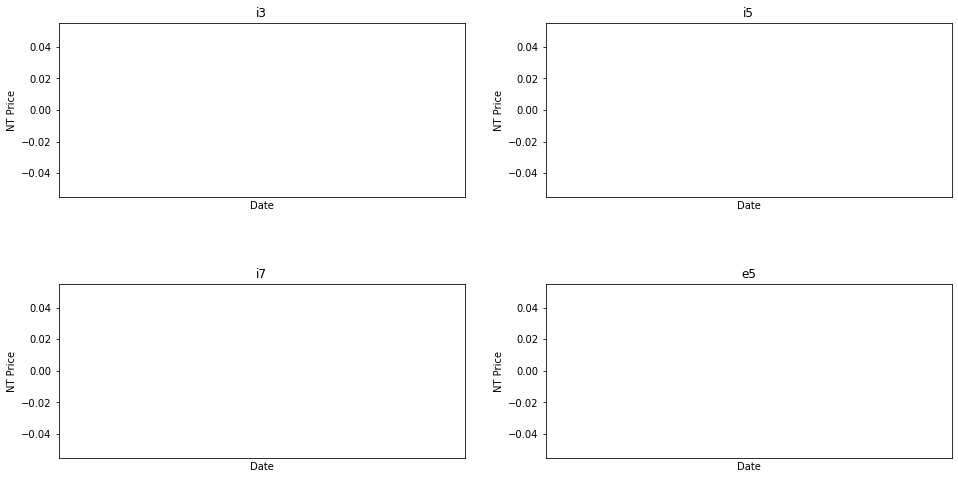

In [ ]:
plt.figure(figsize=(16, 8)) 
plt.subplots_adjust(hspace=0.5) 
for index,c in enumerate(Product): 
  
  plt.subplot(2,2,index+1) 
  Product_df = A[A.filterProduct == c] 
  plt.plot(Product_df["Date"],Product_df["NT Price"]) 
  plt.xticks(list(include_last_iter(0,Product_df.shape[0],300)),rotation="30") 
  plt.title(c) 
  plt.xlabel("Date") 
  plt.ylabel("NT Price") 
    
plt.show() 

In [ ]:
product[product.Date == ['2014-01-02']["NT Price"].to_list()[0]

SyntaxError: ignored

In [ ]:
np.array(product)

array([['2015-10-27', 'i7-6700', 10074.064],
       ['2015-11-17', 'i7-6700', 10170.776],
       ['2015-11-20', 'i7-6700', 10120.88],
       ...,
       ['2021-11-18', 'i7-6700', 8457.28],
       ['2021-11-24', 'i7-6700', 8235.81],
       ['2021-11-26', 'i7-6700', 6811.245]], dtype=object)

In [ ]:
product_li = []
li = product["Date"].to_list()
data_list = list(date_list)
for index,l in enumerate(data_list):
  if(l not in li):
    price = product[product.Date == data_list[index-1]]["NT Price"].to_list()[0]
    product = product.append({"Date":l,"filterProduct":product_model,"NT Price":price},ignore_index=True)
  else:
    price = product[product.Date == l]["NT Price"].to_list()[0]  
  product_li.append(price)

## 3. 資料前處理

In [ ]:
# 切分training data & validation data
total_len = len(product_li)
training_len = 500
validation_data = total_len - training_len

print("總共有 : ",total_len,"筆")
print("訓練用 : (前)",training_len,"筆")
print("驗證用 : (後)",validation_data,"筆")

總共有 :  1953 筆
訓練用 : (前) 500 筆
驗證用 : (後) 1453 筆


In [ ]:
class MinMaxTransformer:
  def __init__(self):
    self.min = None
    self.max = None
    self.distance = None

  def fit(self,data):
    self.min = min(data)
    self.max = max(data)
    self.distance = self.max - self.min
    out = [(d-self.min)/self.distance for d in data]
    return out

  def recover(self,data):
    out = [d*self.distance+self.min for d in data]
    return out

  def transform(self,data):
    out = [(d-self.min)/self.distance for d in data]
    return out

  def tramsform_one(self,data):
    return (data-self.min)/self.distance

  def recover_one(self,data):
    return data*self.distance+self.min

In [ ]:
scalar = MinMaxTransformer()
product_scalar = scalar.fit(product_li)

In [ ]:
#@title Default title text
def min_max(li):
  min_ = min(li)
  max_ = max(li)
  distance_ = max_ - min_
  result = []
  for l in li:
    result.append((l-min_)/distance_)
  return result,min_,max_

#product_scalar,min_,max_ = min_max(product_li)
#print(product_scalar[:10])

In [ ]:
def recover(li,min_,max_):
  result = []
  distance_ = max_ - min_
  for l in li:
    result.append((l*distance_)+min_)
  return result

def recover_one(data,min_,max_):
  distance_ = max_ - min_
  return (data*distance_)+min_

In [ ]:
# 做正規化
print("origin data : ",product_li[:10]) 
print("transform data : ",product_scalar[:10]) 
print("recover data : ",scalar.recover(product_scalar[:10]))

origin data :  [6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245]
transform data :  [0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496]
recover data :  [6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245, 6811.245]


In [ ]:
# 切分資料集
training_data = product_scalar[:training_len] 
validation_data = product_scalar[training_len:] 

print(training_data)
print(validation_data)

[0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.09053794610468496, 0.0905379461

In [ ]:
# todo 決定Seq長度
seq_len = 4

def split_input_target(seq): 
  input_txt = tf.expand_dims(seq[:-1],-1)
  target_txt = tf.expand_dims(seq[1:],-1)
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(<tf.Tensor: shape=(9, 1), dtype=string, numpy=
 array([[b'T'],
        [b'e'],
        [b'n'],
        [b's'],
        [b'o'],
        [b'r'],
        [b'f'],
        [b'l'],
        [b'o']], dtype=object)>, <tf.Tensor: shape=(9, 1), dtype=string, numpy=
 array([[b'e'],
        [b'n'],
        [b's'],
        [b'o'],
        [b'r'],
        [b'f'],
        [b'l'],
        [b'o'],
        [b'w']], dtype=object)>)

In [ ]:
def make_ds(data):
  data_slice = tf.data.Dataset.from_tensor_slices(data) 
  data_sequence = data_slice.batch(seq_len+1,drop_remainder=True) 

  dataset = data_sequence.map(split_input_target)
  return dataset

In [ ]:
# 製作資料集
train_ds = make_ds(training_data)
val_ds = make_ds(validation_data)

for input_example,target_exaple in train_ds.take(1): 
  print("Input :",scalar.recover(input_example.numpy())) 
  print("Target:", scalar.recover(target_exaple.numpy()))
  print("-"*200)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : [array([6811.2446], dtype=float32), array([6811.2446], dtype=float32), array([6811.2446], dtype=float32), array([6811.2446], dtype=float32)]
Target: [array([6811.2446], dtype=float32), array([6811.2446], dtype=float32), array([6811.2446], dtype=float32), array([6811.2446], dtype=float32)]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input : [[0.09053794]
 [0.09053794]
 [0.09053794]
 [0.09053794]]
Target: [[0.09053794]
 [0.09053794]
 [0.09053794]
 [0.09053794]]


In [ ]:
# Batch size
# todo 決定Batch大小
BATCH_SIZE = 8

BUFFER_SIZE = training_len

train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)

train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None))>

## 4. 建立模型

提示: Output是一個數值，所以Model output維度為1。

* 輸入維度應為: (batch,seq_len,1)

* 輸出維度應為: (batch,seq_len,1)

**最後一層Dense不要加上任何activation function。**


In [ ]:
# todo
input_shape = (seq_len,1)

model = keras.Sequential(
    [
     #keras.Input(shape=input_shape)
    
    layers.LSTM(256,input_shape=input_shape,return_sequences=True),
    layers.LSTM(128,return_sequences=True),
    layers.Dense(1),
     
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            197120    
                                                                 
 dense (Dense)               (None, 4, 1)              129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example,target_exaple in train_ds.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (8, 4, 1)
Model output shape : (8, 4, 1)
Model target shape : (8, 4, 1)


## 5. 制定訓練計畫並訓練

我們做數字相關預測，可以考慮用Mean_Squared_Error

公式:
$$MSE = \frac{1}{n} \sum_{i=1}^N({\gamma-\hat{\gamma}})^2$$


提示:
不用管公式在幹嘛，compile帶入mean_squared_error。

In [ ]:
epochs = 30

sgd = tf.optimizers.Adam(learning_rate=0.0001) 

model.compile(loss="mean_squared_error", optimizer="adam") 

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds) 

Epoch 1/30
13/13 [==============================] - 6s 106ms/step - loss: 0.0738 - val_loss: 0.0943
Epoch 2/30
13/13 [==============================] - 0s 36ms/step - loss: 0.0352 - val_loss: 0.0782
Epoch 3/30
13/13 [==============================] - 0s 25ms/step - loss: 0.0254 - val_loss: 0.0497
Epoch 4/30
13/13 [==============================] - 0s 24ms/step - loss: 0.0156 - val_loss: 0.0351
Epoch 5/30
13/13 [==============================] - 0s 24ms/step - loss: 0.0126 - val_loss: 0.0280
Epoch 6/30
13/13 [==============================] - 0s 36ms/step - loss: 0.0096 - val_loss: 0.0230
Epoch 7/30
13/13 [==============================] - 0s 23ms/step - loss: 0.0072 - val_loss: 0.0180
Epoch 8/30
13/13 [==============================] - 0s 24ms/step - loss: 0.0050 - val_loss: 0.0132
Epoch 9/30
13/13 [==============================] - 0s 24ms/step - loss: 0.0036 - val_loss: 0.0098
Epoch 10/30
13/13 [==============================] - 0s 35ms/step - loss: 0.0024 - val_loss: 0.0085
Epoch 11

## 6. 評估模型

dict_keys(['loss', 'val_loss'])


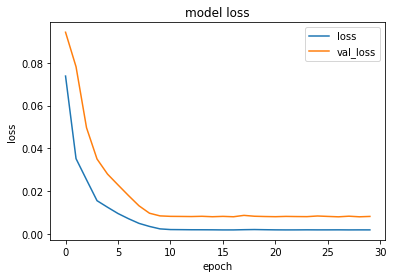

In [ ]:
print(history.history.keys())

l1, = plt.plot(history.history['loss'])
l2, = plt.plot(history.history['val_loss'])
plt.legend(handles=[l1,l2],labels=['loss','val_loss'],loc='best')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Excel 檔案上傳
uploaded = files.upload()

Saving 211011CPU.xlsx to 211011CPU.xlsx


In [ ]:
test_df = pd.read_excel("211011CPU.xlsx") 
test_df = test_df[::1] 
print(test_df.head())
print("Product : ",test_df["Product"].unique()) 
test_df.head() 

   Brand Category       Date    Customer  ... profit (NT.)      GP  Sales   PM
0  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    3962.0095  0.0383    許柏洋  陳柏伸
1  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...   24660.3071  0.1034    許柏洋  鍾惠琪
2  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    1772.0469  0.6374    許柏洋  鍾惠琪
3  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...     915.9484   0.183    許柏洋  鍾惠琪
4  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  ...    8895.4526  0.2312    許柏洋  鍾惠琪

[5 rows x 16 columns]
Product :  ['CM8068404196203 SRGDX(I7-9700E)' '*CM8066201920103 SR2L2(i7-6700)'
 '*CM8062301046804 SR05J (G540)' '*CM8067702870812 SR329(E3-1220 v6)'
 '*CM8064401548111 SR20J(E5-1650 v3)' '*CM8063701095203 SR0P3 (i5-3550S)'
 'CM8068403358413 SR3WX(i7-8700T)' '*CM8066201920404 SR2L6(i5-6500)'
 '*CM8068403362509 SR3XD (i5-8500T)' '*CM8067702868416 SR339(i7-7700T)'
 '*CM8066201927102 SR2HE(i3-6100T)' '*CM8066201927202 SR2HG(i3-6100)'
 'FJ8067702739633 SR340(i5-7300U)' '*CM8068403362607 SR3XE(i5-8500)'

,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪


In [ ]:
def filterProduct(productName):
  name = re.search(r'\(([a-zA-Z][1-9]-.+)\)$$',productName)
  if(name == None):
    return float('NaN')
  else:
    return name.group(1).lower()

test_df["filterProduct"] = test_df["Product"].apply(filterProduct)
test_df.head()

,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM,filterProduct
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸,i7-9700e
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪,i7-6700
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪,NaN
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪,e3-1220 v6
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪,e5-1650 v3


In [ ]:
filter_test = test_df.loc[:,["Date","NT Price","filterProduct"]]
print(filter_test.shape)
filter_test.head()

(1083, 3)


,Date,NT Price,filterProduct
0,2021-11-26,8618.310,i7-9700e
1,2021-11-26,6811.245,i7-6700
2,2021-11-26,695.025,NaN
3,2021-11-26,5004.180,e3-1220 v6
4,2021-11-26,4809.573,e5-1650 v3


In [ ]:
A = filter_test.groupby(["Date","filterProduct"]).mean().reset_index()
A["Date"] = A["Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
print(A.shape)
A.head(10)

(565, 3)


,Date,filterProduct,NT Price
0,2021-10-01,e5-1650 v3,4820.8180
1,2021-10-01,e5-2690 v4,10171.0900
2,2021-10-01,e5-2697 v4,22014.1400
3,2021-10-01,i3-10100e,3404.0250
4,2021-10-01,i3-3220,830.2500
5,2021-10-01,i3-6100,2665.5635
6,2021-10-01,i3-6100t,2905.8750
7,2021-10-01,i3-6100u,4186.4750
8,2021-10-01,i3-8100t,4012.8750
9,2021-10-01,i5-10500te,5396.6250


In [ ]:
# choose Product i3 or i5 or i7
Product = ["i3","i5","i7","e5"]
product_model = "i7-6700"
product = A[A.filterProduct == product_model]
print(product)

           Date filterProduct     NT Price
31   2021-10-01       i7-6700  7221.335889
62   2021-10-05       i7-6700  7250.850000
143  2021-10-14       i7-6700  7459.780000
185  2021-10-19       i7-6700  8068.320000
256  2021-10-26       i7-6700  6979.333333
267  2021-10-27       i7-6700  8018.496000
316  2021-11-01       i7-6700  6972.187333
376  2021-11-05       i7-6700  7223.555000
424  2021-11-11       i7-6700  6864.170000
444  2021-11-12       i7-6700  6788.080000
491  2021-11-18       i7-6700  8457.280000
530  2021-11-24       i7-6700  8235.810000
559  2021-11-26       i7-6700  6811.245000


In [ ]:
init_price = product.iloc[:seq_len,:]["NT Price"].values
dates = []
real_prices = []
pred_prices = []
input = scalar.transform(init_price)


for index,row in list(product.iterrows())[seq_len:]:
  real_price = row["NT Price"]
  real_prices.append(real_price)
  date = row["Date"]
  dates.append(date)

  next_input = np.expand_dims(input,0)
  next_input = np.expand_dims(next_input,-1)

  pred = model.predict(next_input)
  pred = pred[0,-1,0]
  pred_prices.append(pred)
  input.append(scalar.tramsform_one(real_price))
  input = input[-seq_len:]

In [ ]:
print(f"dates : {dates[:10]}")
print(f"real_prices : {real_prices[:10]}")
print(f"pred_prices : {pred_prices[:10]}")
print(len(real_prices),len(pred_prices))

dates : ['2021-10-26', '2021-10-27', '2021-11-01', '2021-11-05', '2021-11-11', '2021-11-12', '2021-11-18', '2021-11-24', '2021-11-26']
real_prices : [6979.333333333333, 8018.496, 6972.187333333333, 7223.555, 6864.17, 6788.08, 8457.28, 8235.81, 6811.245]
pred_prices : [0.4064307, 0.1980032, 0.36771572, 0.1895849, 0.18682313, 0.11915296, 0.08473317, 0.47408423, 0.49087995]
9 9


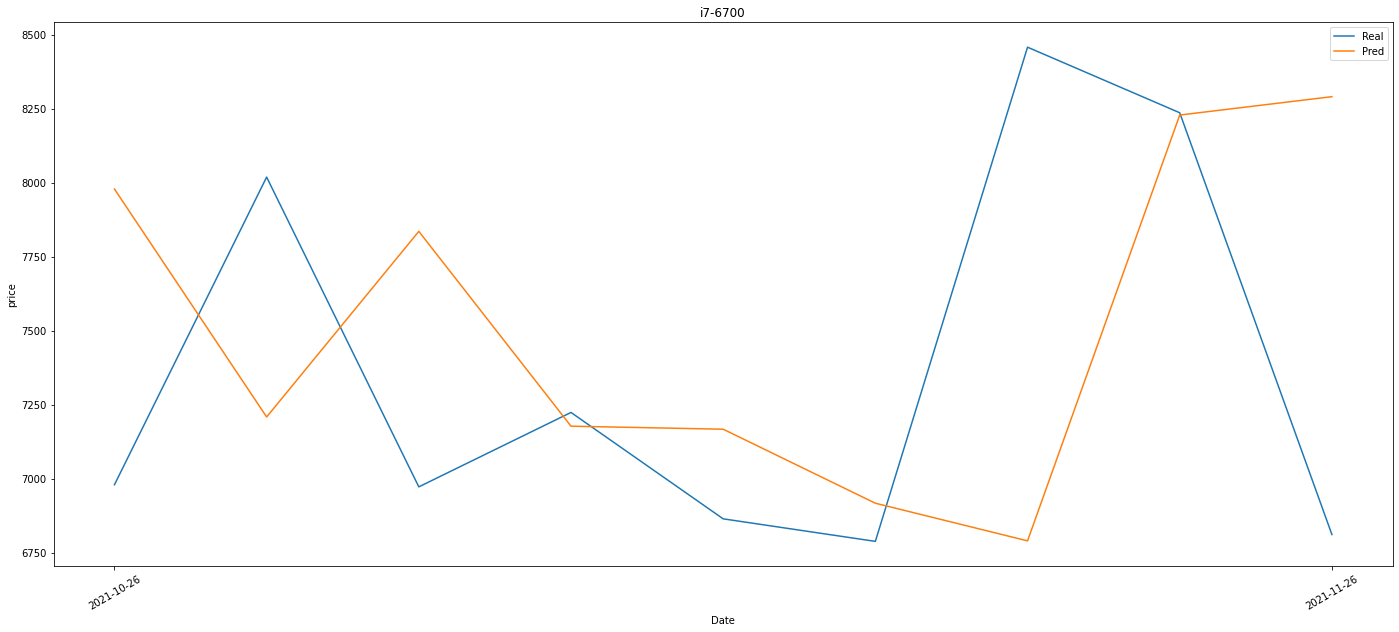

In [ ]:
plt.figure(figsize=(24, 10))
l1, = plt.plot(dates,real_prices)
l2, = plt.plot(dates,scalar.recover(pred_prices))
plt.xticks(list(include_last_iter(0,len(dates),300)),rotation=30)
plt.legend(handles=[l1,l2],labels=['Real','Pred'],loc='best')
plt.title(product_model)
plt.xlabel("Date")
plt.ylabel("price")
plt.show()

以下用不到

In [ ]:

# 預測 Test data
# 現在我們取出了選定公司最後seq_len天
# 我們模型透過讀取seq_len天後預測出seq_len+1天的價格

# 將日期保存在datas中 (list)
# 將真實價格保存在real_prices中 (list)
# 將預測價格保存在pred_prices中 (list) *注: 請填入經過正規化後的價格

# input是一個經過**正規化**的真實價格list，請試著遍歷test_company來填滿上述三個list
# 可以TextGeneration的generateWords function，概念一樣，但是這次input請全部都填入"真實價格"

init_price = product.iloc[-seq_len:,:]["NT Price"].values
print(f"product.iloc[-seq_len:,:] : {product.iloc[-seq_len:,:]}")
print(f"init_price : {init_price}")
dates = []
real_prices = []
pred_prices = []
input = init_price.reshape(1, -1)
#input = [scaler.fit_transform(input)]
print(f"input : {input}")
print(f"input[-seq_len:] : {input[-seq_len:]}")

for index,row in product.iterrows():
  # 我已經幫你把real_price和date放入list
  real_price = row["NT Price"]
  real_prices.append(real_price)
  date = row["Date"]
  dates.append(date)

#print(f"real_prices : {real_prices}{scaler.fit_transform(real_prices)}")
#print(f"dates : {dates}")
  # 參考步驟 (在for迴圈中) :
  # 1. 把input轉**維度**成一個新變數next_input丟入model
  # 2. 獲得的pred取出seq中最後一個時間點的output數值 (提示: [0,-1,0])
  # 3. 把pred丟入pred_prices中
  # 4. 把real_price經過transform_one轉換成小數點並加在input後面
  # 5. 保持input長度為seq_len長 (也就是把最前面的數字踢掉)
  ##########
  # todo #
  ##########
for index,row in product.iterrows():
 for i in range(1):
    next_input = tf.reshape(input,shape=[1,seq_len,1]) 
    predicts = model(next_input)
    predicts = predicts[0,-1] 
    pred = predicts.numpy()
    pred_prices = pred_prices+[pred] 
    #scaler = MinMaxScaler(input_range=(0,1)).fit(input)
    #X_scaled = scaler.transform(scaler)
    input = input+ [scalar.tramsform_one(real_prices[i])] 
    # print(f"input : {input}")
    input = input[-seq_len:] 
    # print(f"input : {input}")
    # print(f"pred_prices : {pred_prices}")

product.iloc[-seq_len:,:] :             Date filterProduct     NT Price
7524  2021-11-23            i7  8111.179429
7528  2021-11-24            i7  8224.690000
7533  2021-11-25            i7  8100.267000
7540  2021-11-26            i7  7834.636400
init_price : [8111.17942857 8224.69       8100.267      7834.6364    ]
input : [[8111.17942857 8224.69       8100.267      7834.6364    ]]
input[-seq_len:] : [[8111.17942857 8224.69       8100.267      7834.6364    ]]


In [ ]:
print(f"dates : {dates[:10]}")
print(f"real_prices : {real_prices[:10]}")
print(f"pred_prices : {pred_prices[:10]}")
print(len(real_prices),len(pred_prices))

dates : ['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16']
real_prices : [7856.177571428571, 9024.525, 10704.658666666666, 7493.5675, 7353.9635, 8426.362400000002, 7350.2784, 8746.119, 7508.815111111111, 7658.265111111111]
pred_prices : [array([1.1920836], dtype=float32), array([1.1920836], dtype=float32), array([1.1920837], dtype=float32), array([1.1920836], dtype=float32), array([1.1920836], dtype=float32), array([1.1920837], dtype=float32), array([1.1920837], dtype=float32), array([1.1920837], dtype=float32), array([1.1920836], dtype=float32), array([1.1920837], dtype=float32)]
1632 1632


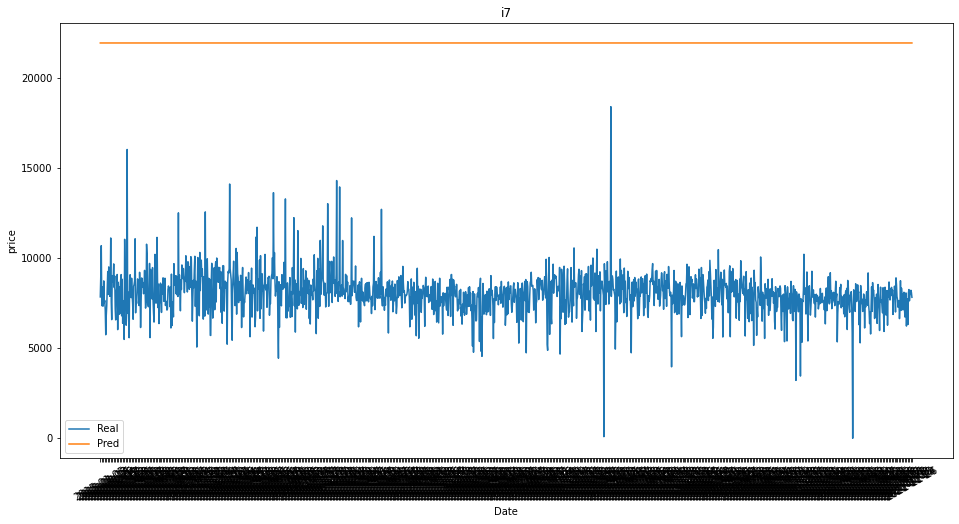

In [ ]:
plt.figure(figsize=(16, 8))
l1, = plt.plot(dates,real_prices)
l2, = plt.plot(dates,scalar.recover(pred_prices))
plt.xticks(list(include_last_iter(0,len(dates),3)),rotation=30)
plt.legend(handles=[l1,l2],labels=['Real','Pred'],loc='best')
plt.title(product_model)
plt.xlabel("Date")
plt.ylabel("price")
plt.show()

---

# 直接寫一個新的

In [1]:
!pip install openpyxl
import tensorflow as tf
from google.colab import files
import io
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
import random
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
uploaded = files.upload()

Saving 1421CPU.xlsx to 1421CPU.xlsx


In [3]:
train_df = pd.read_excel("1421CPU.xlsx") 
train_df = train_df[::1] 
print(train_df.head())
print("Product : ",train_df["Product"].unique()) 
train_df.head() 

   Brand Category       Date    Customer                             Product  \
0  INTEL      CPU 2021-11-26  亞郁科技股份有限公司     CM8068404196203 SRGDX(I7-9700E)   
1  INTEL      CPU 2021-11-26  亞郁科技股份有限公司     *CM8066201920103 SR2L2(i7-6700)   
2  INTEL      CPU 2021-11-26  亞郁科技股份有限公司       *CM8062301046804 SR05J (G540)   
3  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  *CM8067702870812 SR329(E3-1220 v6)   
4  INTEL      CPU 2021-11-26  亞郁科技股份有限公司  *CM8064401548111 SR20J(E5-1650 v3)   

  Currency  Quantity      Cost  Price    Rate  NT Price  revenue (NT.)  \
0        U        12  298.1239  310.0  27.801  8618.310     103419.720   
1        U        35  219.6563  245.0  27.801  6811.245     238393.575   
2        U         4    9.0649   25.0  27.801   695.025       2780.100   
3        U         1  147.0534  180.0  27.801  5004.180       5004.180   
4        U         8  133.0039  173.0  27.801  4809.573      38476.584   

   profit (NT.)      GP Sales   PM  
0     3962.0095  0.0383   許柏洋  陳柏伸  


,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪


In [4]:
def filterProduct(productName):
  name = re.search(r'\(([a-zA-Z][1-9]-.+)\)$$',productName)
  if(name == None):
    return float('NaN')
  else:
    return name.group(1).lower()

train_df["filterProduct"] = train_df["Product"].apply(filterProduct)
train_df.head()

,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM,filterProduct
0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸,i7-9700e
1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪,i7-6700
2,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8062301046804 SR05J (G540),U,4,9.0649,25.0,27.801,695.025,2780.100,1772.0469,0.6374,許柏洋,鍾惠琪,NaN
3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪,e3-1220 v6
4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪,e5-1650 v3


In [5]:
a = train_df["filterProduct"].value_counts(dropna=True).to_dict()
print(a)

{'i7-3770': 1461, 'i7-6700': 1356, 'i7-6700te': 1215, 'i5-6500te': 1145, 'i3-3220': 1089, 'i5-6500': 797, 'i3-6100': 792, 'i5-520m': 765, 'i5-2400': 606, 'i7-7700': 593, 'e5-2620 v4': 568, 'i7-4790': 556, 'i5-3610me ': 551, 'i3-6100te': 526, 'i3-4330': 478, 'i5-3550s': 477, 'i7-2600': 473, 'i7-8700': 443, 'i3-3120me': 435, 'i7-4770s': 421, 'e5-2620 v3': 421, 'i3-6100u': 413, 'e3-1275 v3 ': 407, 'i7-6600u': 380, 'i7-3610qe': 378, 'i5-4590t': 369, 'i3-3120m': 365, 'i7-620m': 364, 'i5-6300u': 356, 'e5-2630 v2 ': 328, 'e5-2630 v3': 325, 'e5-2640 v4': 322, 'e5-2640 v3': 321, 'i5-7500': 321, 'i3-2120': 319, 'i7-4790s': 304, 'e3-1275v2': 302, 'i7-8700t': 299, 'e5-2620': 280, 'i5-4570te': 274, 'i5-3210m': 272, 'i5-7500t': 260, 'e5-2630 v4': 256, 'i7-4770te': 255, 'e5-2650 v4': 253, 'e3-1225 v3': 253, 'i7-4710mq': 242, 'i5-4570': 231, 'i7-7700t': 222, 'e5-2620 v2 ': 222, 'e5-2690 v4': 211, 'i5-8500': 208, 'e5-2650v2': 204, 'e5-1650 v3': 204, 'e5-2609 v2 ': 203, 'i5-8500t': 202, 'i3-4130': 201, 

In [6]:
date_list = train_df["Date"].apply(lambda x: x.strftime("%Y-%m-%d")).iloc[::-1].unique()
print(date_list,len(date_list))

['2014-01-02' '2014-01-03' '2014-01-06' ... '2021-11-24' '2021-11-25'
 '2021-11-26'] 1953


In [7]:
train_df = train_df.dropna()
train_df = train_df.reset_index()
print(train_df.shape)
train_df.head()

(42717, 18)


,index,Brand,Category,Date,Customer,Product,Currency,Quantity,Cost,Price,Rate,NT Price,revenue (NT.),profit (NT.),GP,Sales,PM,filterProduct
0,0,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,CM8068404196203 SRGDX(I7-9700E),U,12,298.1239,310.0,27.801,8618.310,103419.720,3962.0095,0.0383,許柏洋,陳柏伸,i7-9700e
1,1,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8066201920103 SR2L2(i7-6700),U,35,219.6563,245.0,27.801,6811.245,238393.575,24660.3071,0.1034,許柏洋,鍾惠琪,i7-6700
2,3,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8067702870812 SR329(E3-1220 v6),U,1,147.0534,180.0,27.801,5004.180,5004.180,915.9484,0.183,許柏洋,鍾惠琪,e3-1220 v6
3,4,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8064401548111 SR20J(E5-1650 v3),U,8,133.0039,173.0,27.801,4809.573,38476.584,8895.4526,0.2312,許柏洋,鍾惠琪,e5-1650 v3
4,5,INTEL,CPU,2021-11-26,亞郁科技股份有限公司,*CM8063701095203 SR0P3 (i5-3550S),U,7,48.5627,137.0,27.801,3808.737,26661.159,17210.5176,0.6455,許柏洋,鍾惠琪,i5-3550s


In [8]:
filter_train = train_df.loc[:,["Date","NT Price","filterProduct","Quantity"]]
print(filter_train.shape)
filter_train.head()

(42717, 4)


,Date,NT Price,filterProduct,Quantity
0,2021-11-26,8618.310,i7-9700e,12
1,2021-11-26,6811.245,i7-6700,35
2,2021-11-26,5004.180,e3-1220 v6,1
3,2021-11-26,4809.573,e5-1650 v3,8
4,2021-11-26,3808.737,i5-3550s,7


In [9]:
A = filter_train.groupby(["Date","filterProduct"]).mean().reset_index()
A["Date"] = A["Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
print(A.shape)
A.head(10)

(32758, 4)


,Date,filterProduct,NT Price,Quantity
0,2014-01-02,e3-1270v2,9211.7025,200.0
1,2014-01-02,e5-1620,8415.9500,1.0
2,2014-01-02,e5-2609,7680.0000,2.5
3,2014-01-02,e5-2620,9763.7000,2.0
4,2014-01-02,e5-2650,28498.4700,25.0
5,2014-01-02,e5-2660 v2,36186.1500,50.0
6,2014-01-02,e5-2670,40029.9900,1.0
7,2014-01-02,e5-2687w,52402.3500,4.0
8,2014-01-02,i3-3120m,2987.9850,100.0
9,2014-01-02,i3-350m,2071.3000,1.0


In [10]:
# choose Product i3 or i5 or i7
Product = ["i3","i5","i7","e5"]
product_model = "i7-6700"
product = A[A.filterProduct == product_model]
print(product)

             Date filterProduct   NT Price  Quantity
6603   2015-10-27       i7-6700  10074.064      98.0
6866   2015-11-17       i7-6700  10170.776     150.0
6945   2015-11-20       i7-6700  10120.880     112.0
7026   2015-11-30       i7-6700   9973.805     464.0
7306   2015-12-18       i7-6700  10141.745     200.0
...           ...           ...        ...       ...
32617  2021-11-11       i7-6700   6864.170     297.2
32637  2021-11-12       i7-6700   6788.080     300.0
32684  2021-11-18       i7-6700   8457.280     118.0
32723  2021-11-24       i7-6700   8235.810      30.0
32752  2021-11-26       i7-6700   6811.245      35.0

[697 rows x 4 columns]


In [11]:
def include_last_iter(start,end,step):
  i = start 
  while i < end: 
      yield i 
      i += step 
  yield end-1 

In [12]:
product


,Date,filterProduct,NT Price,Quantity
6603,2015-10-27,i7-6700,10074.064,98.0
6866,2015-11-17,i7-6700,10170.776,150.0
6945,2015-11-20,i7-6700,10120.880,112.0
7026,2015-11-30,i7-6700,9973.805,464.0
7306,2015-12-18,i7-6700,10141.745,200.0
...,...,...,...,...
32617,2021-11-11,i7-6700,6864.170,297.2
32637,2021-11-12,i7-6700,6788.080,300.0
32684,2021-11-18,i7-6700,8457.280,118.0
32723,2021-11-24,i7-6700,8235.810,30.0


Text(0, 0.5, 'NT Price')

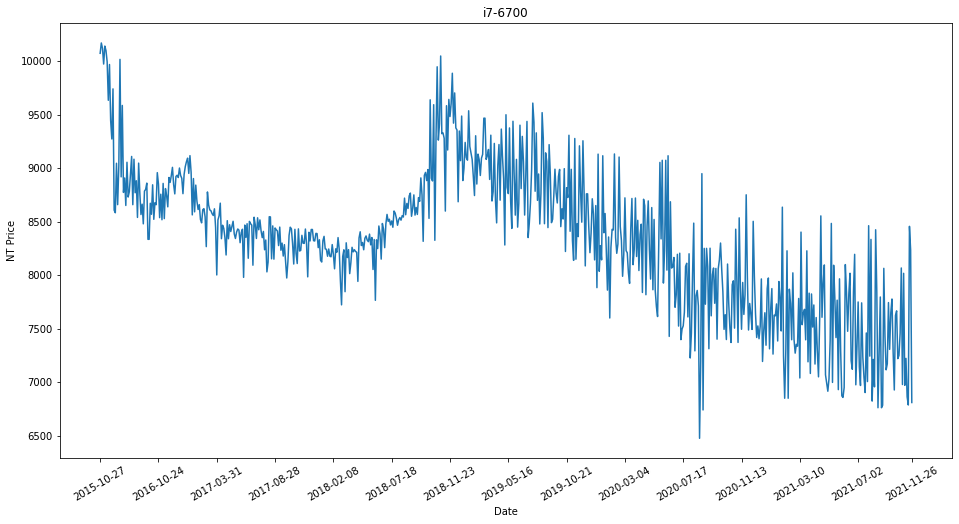

In [13]:
plt.figure(figsize=(16, 8)) 
plt.subplots_adjust(hspace=0.5) 

Product_df = A[A.filterProduct == product_model]
plt.plot(Product_df["Date"],Product_df["NT Price"]) 
plt.xticks(list(include_last_iter(0,Product_df.shape[0],50)),rotation="30") 
plt.title(product_model) 
plt.xlabel("Date") 
plt.ylabel("NT Price")

In [15]:
product_li = product["NT Price"].to_list()
date_li = product["Date"].to_list()
Quantity_li = product["Quantity"].to_list()
print(Quantity_li)

[98.0, 150.0, 112.0, 464.0, 200.0, 515.0, 600.0, 1.0, 0.5, 4.0, 1.0, 314.0, 315.0, 300.0, 20.0, 400.0, 1.0, -1.0, 2.0, -1.0, 315.0, 5.5, -1.0, 2.0, 945.0, 315.0, 320.0, 4.0, 315.0, 1.0, 30.0, 6.0, 630.0, 1.0, 5.0, 324.5, 20.0, 630.0, 80.0, 473.0, 16.0, 987.0, -2.0, 220.66666666666666, 300.0, 2.0, 35.0, 20.0, 246.33333333333334, 1.0, 10.0, 315.0, 135.0, 12.0, 2.0, 630.0, 10.0, 4.666666666666667, 945.0, 25.0, 148.5, 10.0, 1.0, 20.0, 13.25, -1.3, 11.0, 11.0, 1.0, 300.0, 13.0, 2.0, 5.0, 24.0, 1.0, 55.0, 10.333333333333334, 1.0, 5.0, 315.0, 1.0, 155.0, 16.0, 31.0, 30.0, -0.5882352941176471, 30.0, 20.0, 1.0, 2.0, 30.0, 100.0, 2.0, 2.0, 20.0, 10.5, 1.0, 1.0, 2.0, 1.0, 315.0, 21.5, 11.0, 5.0, 1.0, 3.0, 1.0, 28.666666666666668, -1.0, 25.0, 50.5, 1.0, 2.0, 1.0, 2.0, 4.0, 30.0, 10.0, 2.0, 10.0, 0.0, 10.0, 2.0, 315.0, 1.0, 2.0, 1.0, -1.0, 1.0, 5.5, 13.333333333333334, -1.0, 1.0, 30.0, 101.5, 1.0, 30.0, 5.0, 2.5, 200.0, 5.0, -1.0, 18.0, 300.0, 1.0, 8.0, -1.0, 4.0, 1.0, 2.0, 1.5, 3.0, 3.5, 40.0, 5.0

In [16]:
# 切分training data & validation data
total_len = len(product_li)
training_len = 500
validation_data = total_len - training_len

print("總共有 : ",total_len,"筆")
print("訓練用 : (前)",training_len,"筆")
print("驗證用 : (後)",validation_data,"筆")

總共有 :  697 筆
訓練用 : (前) 500 筆
驗證用 : (後) 197 筆


In [17]:
class MinMaxTransformer:
  def __init__(self):
    self.min = None
    self.max = None
    self.distance = None

  def fit(self,data):
    self.min = min(data)
    self.max = max(data)
    self.distance = self.max - self.min
    out = [(d-self.min)/self.distance for d in data]
    return out

  def recover(self,data):
    out = [d*self.distance+self.min for d in data]
    return out

  def transform(self,data):
    out = [(d-self.min)/self.distance for d in data]
    return out

  def tramsform_one(self,data):
    return (data-self.min)/self.distance

  def recover_one(self,data):
    return data*self.distance+self.min

In [18]:
scalar = MinMaxTransformer()
product_scalar = scalar.fit(product_li)

In [19]:
print("origin data : ",product_li[:10]) 
print("transform data : ",product_scalar[:10]) 
print("recover data : ",scalar.recover(product_scalar[:10]))

origin data :  [10074.064, 10170.776, 10120.88, 9973.805, 10141.745, 10099.53, 9994.347, 9635.25, 9969.386999999999, 9446.4]
transform data :  [0.9738189961169212, 1.0, 0.9864926030921694, 0.9466777802562877, 0.9921409884633795, 0.98071292287768, 0.952238725968983, 0.8550272118714362, 0.9454817789828627, 0.8039034362973663]
recover data :  [10074.064, 10170.776, 10120.88, 9973.805, 10141.745, 10099.53, 9994.347, 9635.25, 9969.386999999999, 9446.4]


In [20]:
# 切分資料集
training_data = product_scalar[:training_len] 
validation_data = product_scalar[training_len:] 

print(training_data)
print(validation_data)

[0.9738189961169212, 1.0, 0.9864926030921694, 0.9466777802562877, 0.9921409884633795, 0.98071292287768, 0.952238725968983, 0.8550272118714362, 0.9454817789828627, 0.8039034362973663, 0.7571245725473041, 0.8838628079879242, 0.5770903763316277, 0.5705405232735674, 0.6956937457092303, 0.5910168338938857, 0.688621149677204, 0.95846250760698, 0.6612996402792005, 0.8419283178883673, 0.6219249935570776, 0.6584521664461274, 0.588971882870923, 0.698228683673094, 0.6102578901433034, 0.6236921950765245, 0.6687659854855581, 0.7129152977712903, 0.5909377862769003, 0.7059683116511855, 0.6211044684643323, 0.6515174976772994, 0.5587340036860012, 0.6960440457653215, 0.6219161503305202, 0.5660191078664291, 0.5922507347097002, 0.5424778071108206, 0.6252449934704504, 0.629559775158258, 0.6454916057927825, 0.5033384082625336, 0.5033384082625336, 0.5945378818559369, 0.5666861398124947, 0.6412315618726274, 0.5539119636944041, 0.5960000822961492, 0.5909188365057053, 0.6719967861188052, 0.6430469499531131, 0.5

In [21]:
# todo 決定Seq長度
seq_len = 4

def split_input_target(seq): 
  input_txt = tf.expand_dims(seq[:-1],-1)
  target_txt = tf.expand_dims(seq[1:],-1)
  return input_txt,target_txt

In [22]:
def make_ds(data):
  data_slice = tf.data.Dataset.from_tensor_slices(data) 
  data_sequence = data_slice.batch(seq_len+1,drop_remainder=True) 

  dataset = data_sequence.map(split_input_target)
  return dataset

In [23]:
# 製作資料集
train_ds = make_ds(training_data)
val_ds = make_ds(validation_data)

for input_example,target_exaple in train_ds.take(1): 
  print("Input :",scalar.recover(input_example.numpy())) 
  print("Target:", scalar.recover(target_exaple.numpy()))
  print("-"*200)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : [array([10074.064], dtype=float32), array([10170.775], dtype=float32), array([10120.88], dtype=float32), array([9973.805], dtype=float32)]
Target: [array([10170.775], dtype=float32), array([10120.88], dtype=float32), array([9973.805], dtype=float32), array([10141.745], dtype=float32)]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input : [[0.973819 ]
 [1.       ]
 [0.9864926]
 [0.9466778]]
Target: [[1.       ]
 [0.9864926]
 [0.9466778]
 [0.992141 ]]


In [24]:
# Batch size
# todo 決定Batch大小
BATCH_SIZE = 8

BUFFER_SIZE = training_len

train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)

train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None))>

In [25]:
# todo
input_shape = (seq_len,1)

model = keras.Sequential(
    [
     #keras.Input(shape=input_shape)
    
    layers.LSTM(256,input_shape=input_shape,return_sequences=True),
    layers.LSTM(128,return_sequences=True),
    layers.Dense(1),
     
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            197120    
                                                                 
 dense (Dense)               (None, 4, 1)              129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


In [26]:
for input_example,target_exaple in train_ds.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (8, 4, 1)
Model output shape : (8, 4, 1)
Model target shape : (8, 4, 1)


In [27]:
epochs = 20

sgd = tf.optimizers.Adam(learning_rate=0.0001) 

model.compile(loss="mean_squared_error", optimizer="adam") 

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds) 

Epoch 1/20
13/13 [==============================] - 5s 88ms/step - loss: 0.1837 - val_loss: 0.0558
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0812 - val_loss: 0.0279
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0498 - val_loss: 0.0288
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0290 - val_loss: 0.0388
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0225 - val_loss: 0.0412
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0169 - val_loss: 0.0320
Epoch 7/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0137 - val_loss: 0.0305
Epoch 8/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0123 - val_loss: 0.0397
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 0.0386
Epoch 10/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0103 - val_loss: 0.0359
Epoch 11/

dict_keys(['loss', 'val_loss'])


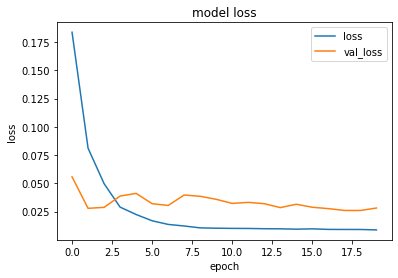

In [28]:
print(history.history.keys())

l1, = plt.plot(history.history['loss'])
l2, = plt.plot(history.history['val_loss'])
plt.legend(handles=[l1,l2],labels=['loss','val_loss'],loc='best')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [29]:
#print(history.history.keys())
#l1, = plt.plot(history.history['accuracy'])
#l2, = plt.plot(history.history['val_accuracy'])
#plt.legend(handles=[l1,l2],labels=['accuracy','val_accuracy'],loc='best')
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.show()


In [30]:
init_price = training_data[-seq_len:]
dates = []
real_prices = []
pred_prices = []
input = scalar.transform(init_price)

for index,row in list(product.iterrows())[training_len:]:
  real_price = row["NT Price"]
  real_prices.append(real_price)
  date = row["Date"]
  dates.append(date)

  next_input = np.expand_dims(input,0)
  next_input = np.expand_dims(next_input,-1)

  pred = model.predict(next_input)
  pred = pred[0,-1,0]
  pred_prices.append(pred)
  input.append(scalar.tramsform_one(real_price))
  input = input[-seq_len:]

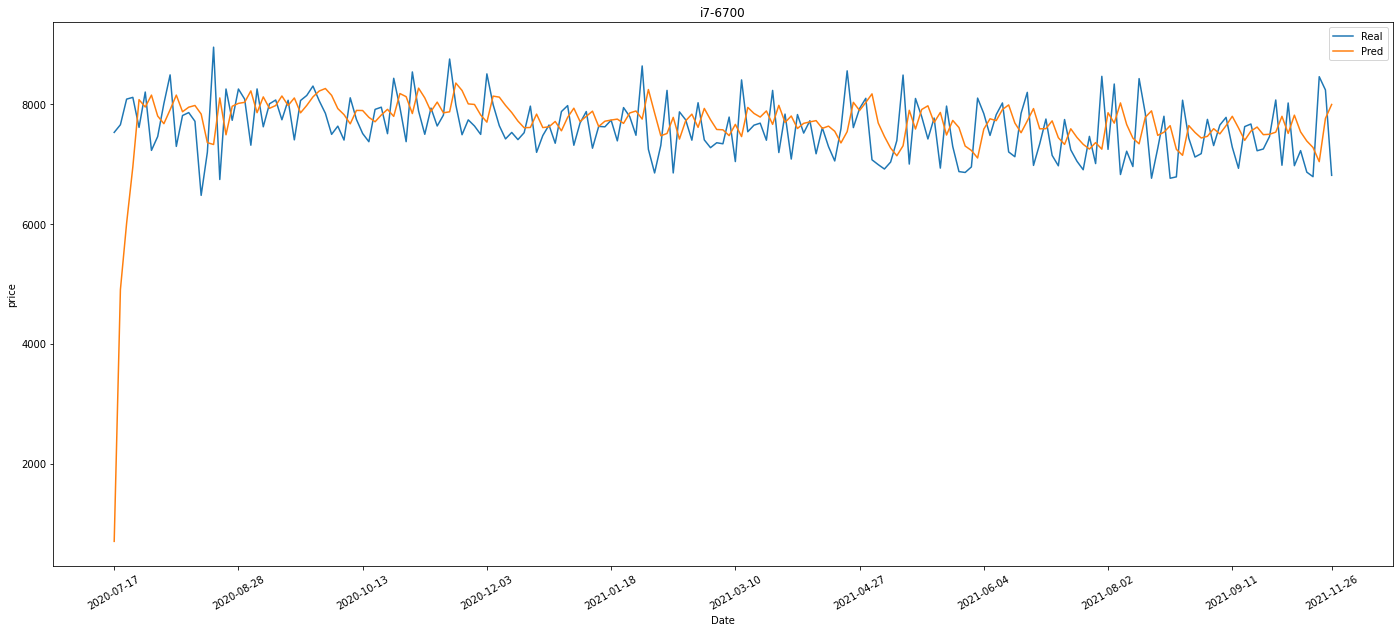

In [31]:
plt.figure(figsize=(24, 10))
l1, = plt.plot(dates,real_prices)
l2, = plt.plot(dates,scalar.recover(pred_prices))
plt.xticks(list(include_last_iter(0,len(dates),20)),rotation=30)
plt.legend(handles=[l1,l2],labels=['Real','Pred'],loc='best')
plt.title(product_model)
plt.xlabel("Date")
plt.ylabel("price")
plt.show()